<a href="https://colab.research.google.com/github/AlexandreLarget/advanced_computer_vision/blob/main/04_ACV_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from glob import glob

### Load the data

In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 17.83 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Checking out files: 100% (90503/90503), done.


In [ ]:
!ls

Fruit-Images-Dataset  sample_data


In [ ]:
!ls Fruit-Images-Dataset

LICENSE  papers  readme.md  src  Test  test-multiple_fruits  Training


In [ ]:
train_path = "Fruit-Images-Dataset/Training"
valid_path = "Fruit-Images-Dataset/Test"

In [ ]:
image_files = glob(train_path + "/*/*.jp*g")
valid_image_files = glob(valid_path + "/*/*.jp*g")

In [ ]:
folders = glob(train_path + "/*")

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np

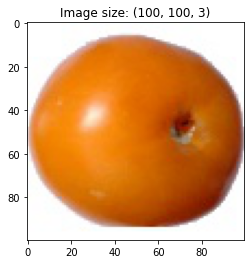

In [ ]:
sample = image.img_to_array(image.load_img(np.random.choice(image_files))).astype("uint8")
plt.imshow(sample)
plt.title(f"Image size: {sample.shape}");

### Build the model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
vgg = VGG16(input_shape=sample.shape, weights="imagenet", include_top=False)

for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = layers.Flatten()(vgg.output)
x = layers.Dense(512, activation="relu")(x)
prediction = layers.Dense(len(folders), activation="softmax")(x)

model = tf.keras.Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Make a generator

In [ ]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input # from tensorflow.keras.applications.vgg16 import preprocess_input
)

In [ ]:
test_gen = gen.flow_from_directory(valid_path, target_size=[100, 100])
print(test_gen.class_indices)

Found 22688 images belonging to 131 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape Wh

In [ ]:
labels = [None] * len(test_gen.class_indices)
labels[:5]

[None, None, None, None, None]

In [ ]:
for k, v in test_gen.class_indices.items():
  labels[v] = k

In [ ]:
labels[:5]

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3']

min: -113.06242 max: 151.061


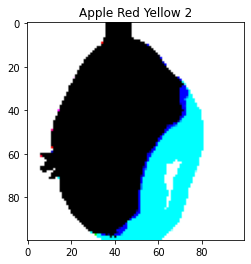

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.imshow(x[0])
  plt.title(labels[np.argmax(y[0])])
  plt.show()
  print(y[0]) # y is in OHE format
  break

### Create definitive generator

In [ ]:
train_generator = gen.flow_from_directory(train_path,
                                          target_size=(100, 100),
                                          shuffle=True,
                                          batch_size=32)

Found 67692 images belonging to 131 classes.


In [ ]:
valid_generator = gen.flow_from_directory(valid_path,
                                          target_size=(100, 100),
                                          shuffle=True,
                                          batch_size=32)

Found 22688 images belonging to 131 classes.


In [ ]:
r = model.fit(train_generator,
              validation_data=valid_generator,
              epochs=3,
              steps_per_epoch=len(image_files) // 32,
              validation_steps=len(valid_image_files) // 32)

Epoch 1/3
2115/2115 [==============================] - 278s 131ms/step - loss: 1.0851 - accuracy: 0.8607 - val_loss: 1.7211 - val_accuracy: 0.8826
Epoch 2/3
2115/2115 [==============================] - 271s 128ms/step - loss: 0.4128 - accuracy: 0.9605 - val_loss: 2.0828 - val_accuracy: 0.9103
Epoch 3/3
2115/2115 [==============================] - 266s 126ms/step - loss: 0.3156 - accuracy: 0.9735 - val_loss: 2.0616 - val_accuracy: 0.9275


In [ ]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  #print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break
  cm = confusion_matrix(targets, predictions)
  return cm

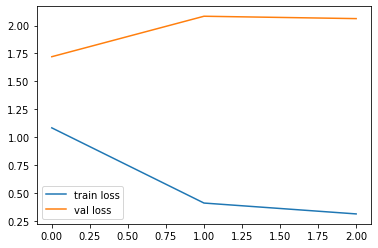

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

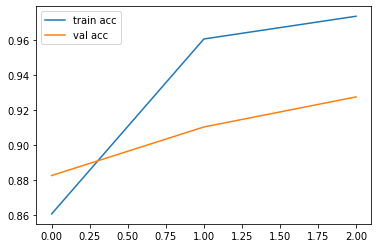

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  #print(cm)
  plt.figure(figsize=(30,30))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
IMAGE_SIZE=(100, 100)
batch_size=32

In [ ]:
cm = get_confusion_matrix(train_path, len(image_files))
#print(cm)

In [ ]:
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
#print(valid_cm)

Confusion matrix, without normalization


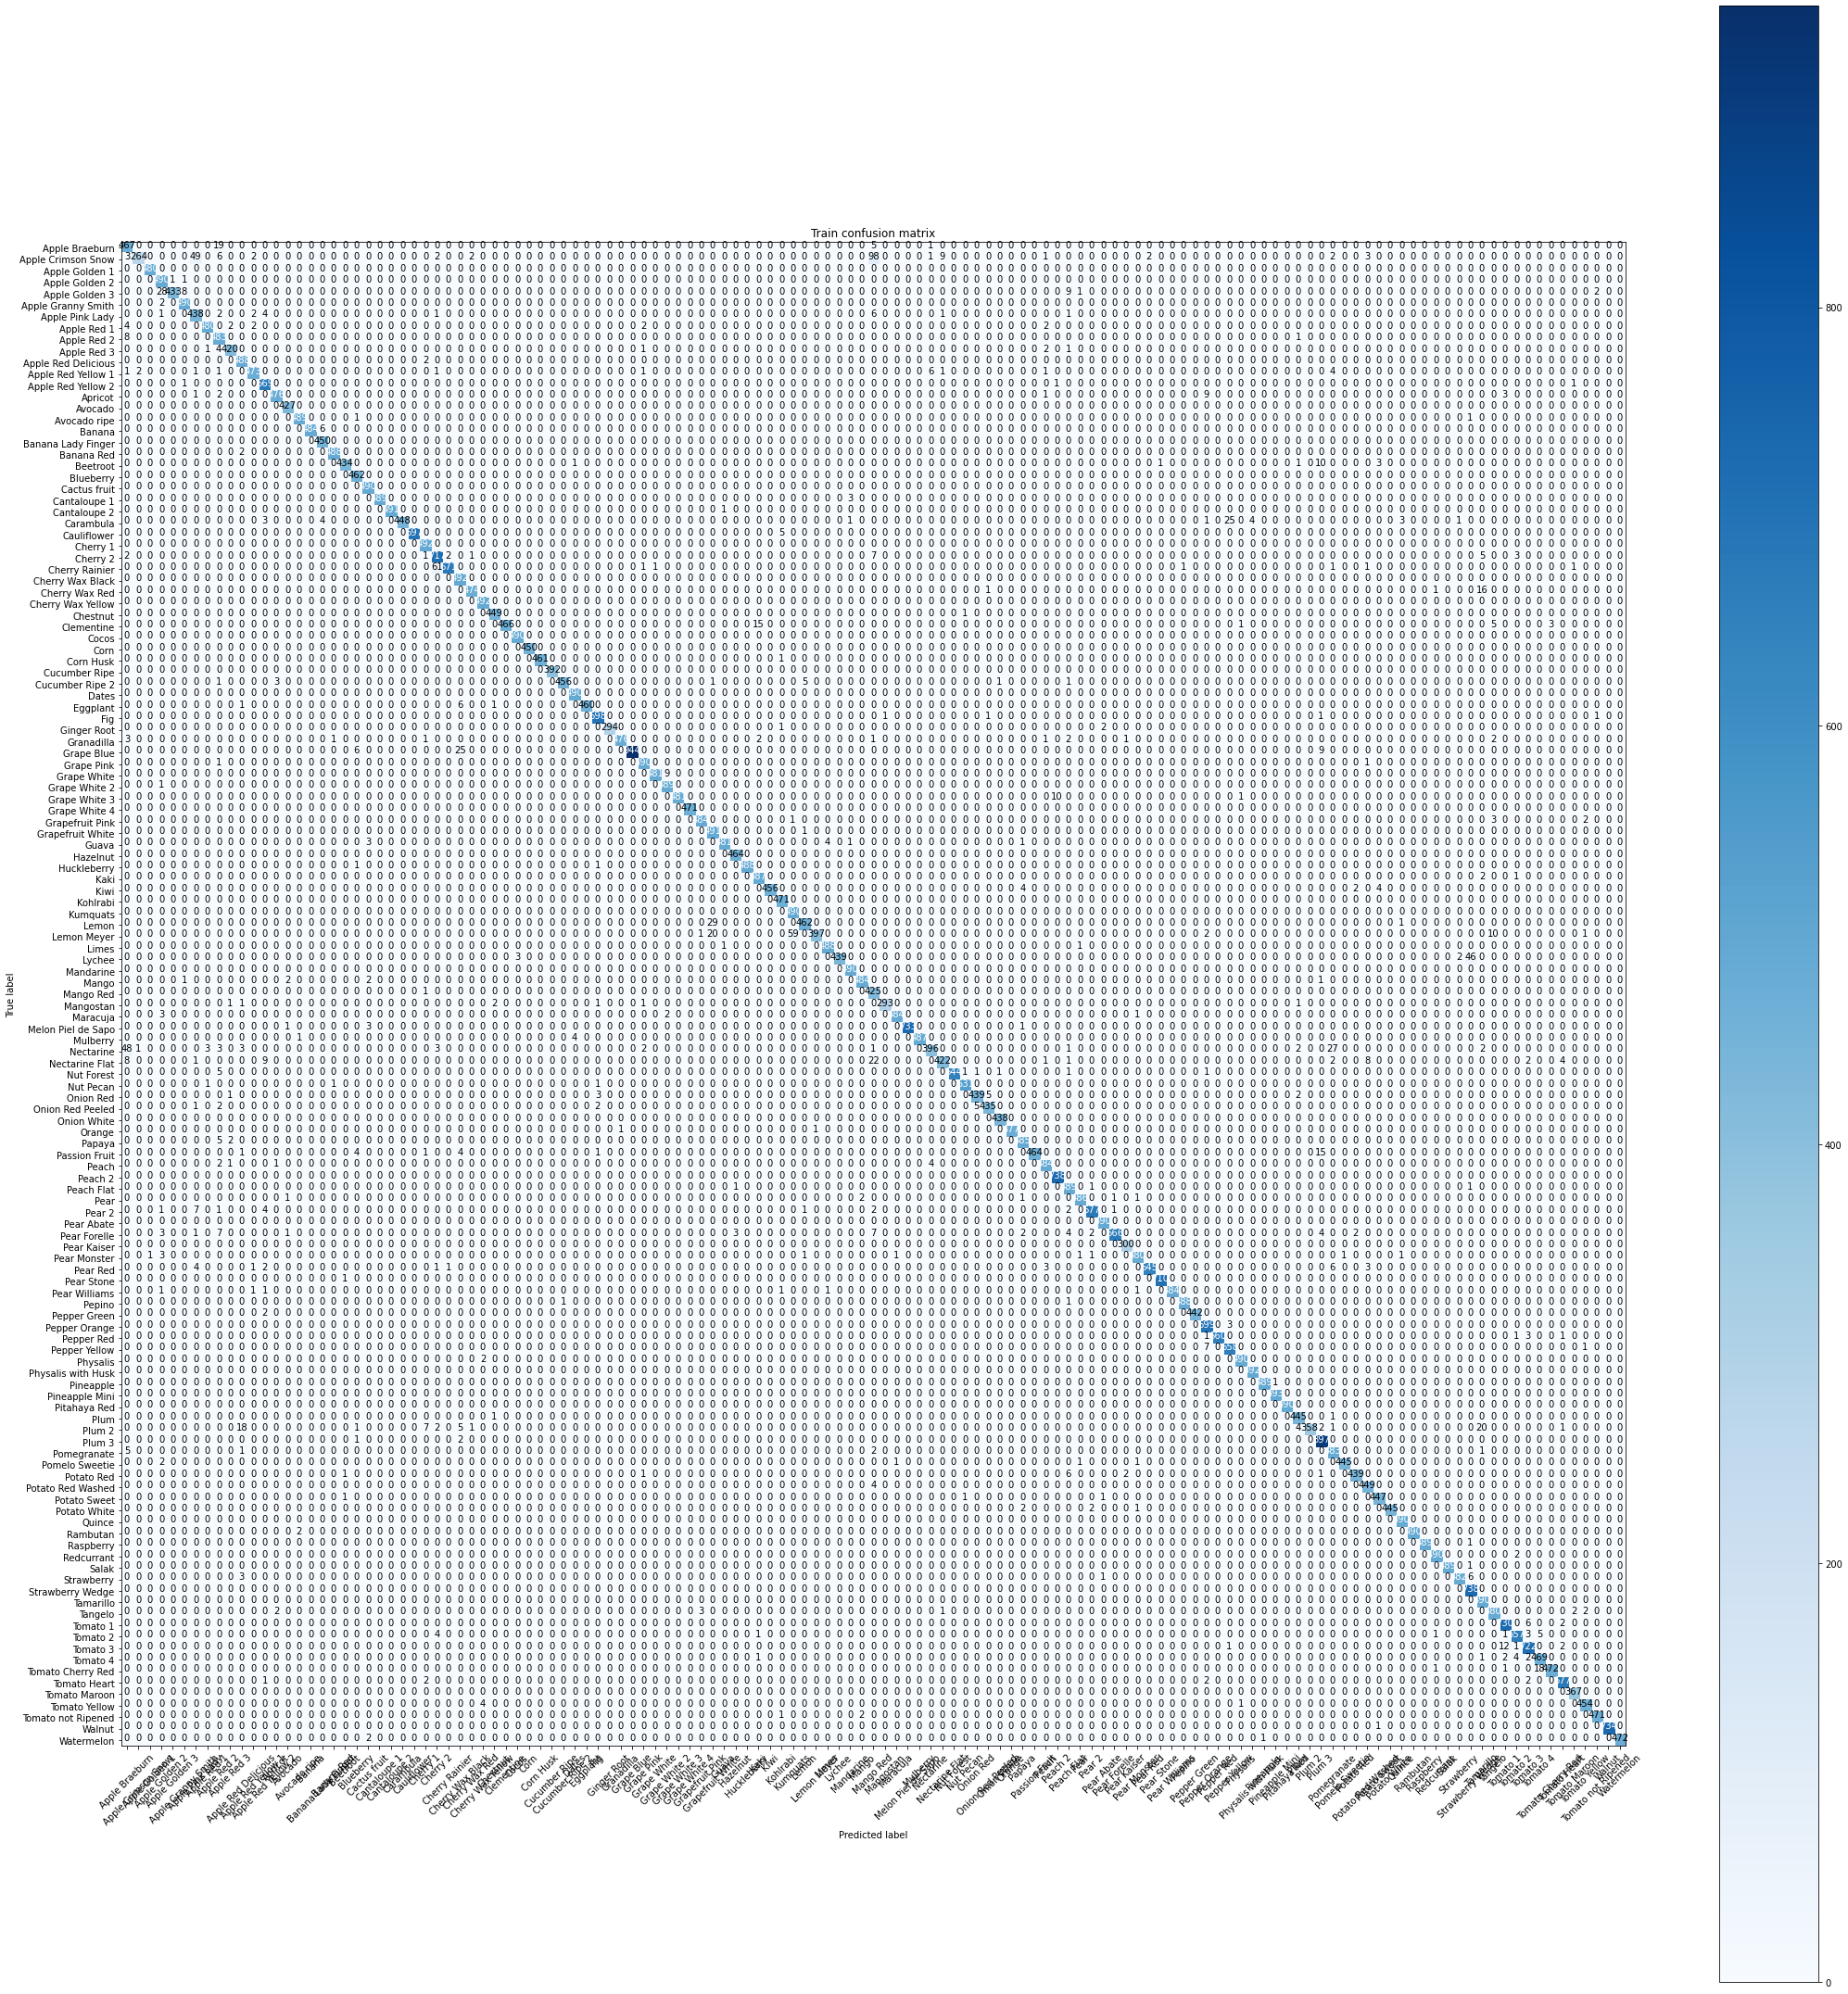

In [ ]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')